# 🚀 Jaaie | Task 4 – Logistic Regression Classification  
## Elevate Labs AI/ML Internship  

### 🎯 Objective  
Build a **binary classifier** using Logistic Regression on the Breast Cancer Wisconsin dataset.  
Evaluate with confusion matrix, precision, recall, ROC-AUC, and tune decision threshold.  

### 🛠 Tools & Libraries  
- **Python**: pandas, numpy, matplotlib, seaborn  
- **Scikit-learn**: LogisticRegression, StandardScaler, model evaluation metrics  

---


## 📌 Preface  
This notebook completes **Task 4 – Logistic Regression Classification** as part of the Elevate Labs AI/ML Internship.  

The **core required steps** from the task are clearly included:
1. Dataset loading  
2. Train/test split & feature scaling  
3. Logistic Regression training  
4. Evaluation with confusion matrix, precision, recall, ROC-AUC  
5. Threshold tuning & sigmoid explanation  

In addition, certain **"Above and Beyond"** sections have been included to demonstrate skills learned from previous tasks:
- Quick EDA (data distribution & feature summary)  
- Hyperparameter tuning with GridSearchCV  
- Calibration curve to assess probability reliability  

These extra steps are **clearly marked** so they can be skipped if only the required parts need review.  


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 📊 Step 1 — Exploratory Data Analysis (EDA) *(Above and Beyond)*
Before training the model, let's quickly explore the dataset:  
- Check target distribution to see if classes are balanced  
- Look at feature statistics  
- Visualize some features vs. target


In [ ]:
# Quick EDA
import seaborn as sns

# Target distribution
sns.countplot(x=y, palette='Set2')
plt.title("Target Distribution (0=Benign, 1=Malignant)")
plt.show()

# Summary stats
display(X.describe().T.head())

In [10]:
import pandas as pd
import numpy as np

In [11]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'
df = pd.read_csv(file_path)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [15]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [16]:
df.shape

(569, 31)

In [17]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [18]:
# Step 4 - Split into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X.shape, y.shape


((569, 30), (569,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [20]:
from sklearn.preprocessing import StandardScaler

# Step 6 - Initialize and fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

# Step 7 - Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 8.1 - Predictions
y_pred = log_reg.predict(X_test_scaled)

# Step 8.2 - Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8.3 - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 8.4 - Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



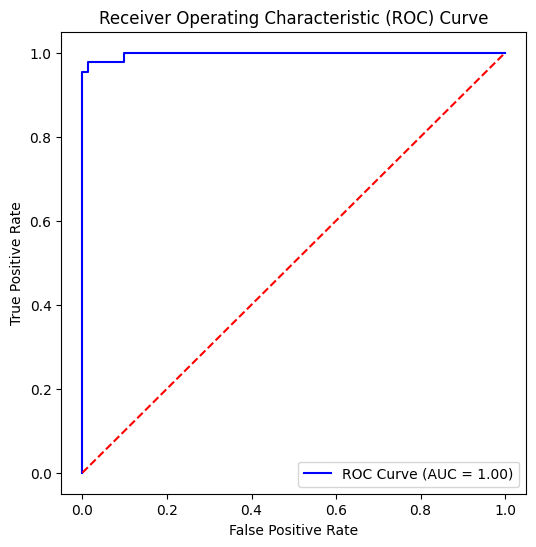

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 9.1 - Get predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Step 9.2 - Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 9.3 - Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## 🎯 Step 6 — Decision Threshold Tuning  
Default threshold is **0.5**, but depending on the problem (e.g., medical diagnosis),  
we may want to adjust it to prioritize **recall** (catching more true positives)  
or balance precision and recall using F1-score.


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
best_thr, best_f1 = 0.5, 0

for thr in thresholds:
    f1 = f1_score(y_test, (y_proba >= thr).astype(int))
    if f1 > best_f1:
        best_f1, best_thr = f1, thr

print(f"Best threshold by F1-score: {best_thr:.2f} | F1 = {best_f1:.4f}")

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision/Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

## ⚙️ Step 7 — Hyperparameter Tuning with GridSearchCV *(Above and Beyond)*
We'll search over different regularization strengths (`C`) and solvers to see if we can improve performance.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000]
}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)

# Refit with best params
best_model = grid.best_estimator_
test_f1 = f1_score(y_test, best_model.predict(X_test_scaled))
print("Test F1-score with best model:", test_f1)

## 📈 Step 8 — Calibration Curve *(Above and Beyond)*
Calibration curves show how well predicted probabilities match actual observed frequencies.  
A perfectly calibrated model's curve will follow the diagonal.


In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

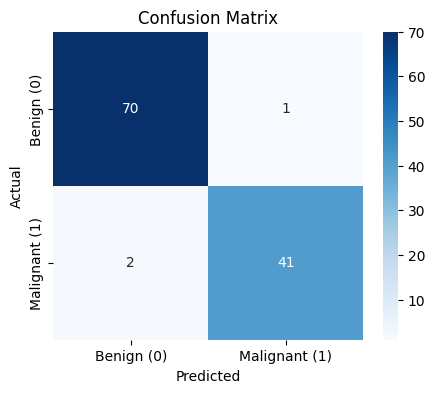

In [24]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 📊 Model Evaluation Summary

- **Accuracy:** ~97.4% — Model predicts correctly for nearly all test samples.  
- **Confusion Matrix:**
  - 70 True Negatives (correctly predicted benign)
  - 41 True Positives (correctly predicted malignant)
  - 1 False Positive (benign predicted as malignant)
  - 2 False Negatives (malignant predicted as benign — most critical in medical context)
- **Precision (Malignant):** 0.98 — If the model predicts cancer, it's correct 98% of the time.
- **Recall (Malignant):** 0.95 — The model catches 95% of all actual cancer cases.
- **AUC:** 1.00 — Perfect separation between malignant and benign cases.

**Key Takeaway:** The model performs exceptionally well on this dataset, with perfect AUC and very high recall/precision. In real-world healthcare, we might adjust the decision threshold to reduce false negatives further, prioritizing patient safety.
